In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive

/gdrive


In [ ]:
cd MyDrive/Colab/HW-Rec/

[Errno 2] No such file or directory: 'MyDrive/Colab/HW-Rec/'
/gdrive/MyDrive/Colab/HW-Rec


In [ ]:
ls

HW-Rec.ipynb  hw-tf.ipynb  mnist.h5


In [ ]:
import tensorflow as tf

data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

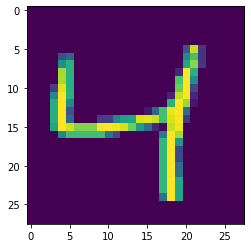

In [ ]:
plt.imshow(x_train[2])
plt.show()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        8, (5, 5), activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(16, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5)
loss, acc = model.evaluate(x_test, y_test)
print("Acc = {}%".format(100*acc))

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5961 - accuracy: 0.8069
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1410 - accuracy: 0.9556
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1150 - accuracy: 0.9636
Epoch 4/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0970 - accuracy: 0.9699
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0345 - accuracy: 0.9895
Acc = 98.94999861717224%


In [ ]:
import numpy as np

In [ ]:
model.predict(x_train[0:3])

array([[2.34385000e-09, 6.43847727e-07, 1.07025571e-07, 5.01534879e-01,
        7.77467757e-10, 4.98430312e-01, 1.83445493e-07, 1.16719200e-07,
        1.86436284e-06, 3.18445818e-05],
       [9.99999762e-01, 5.38541989e-10, 2.49021181e-09, 1.46106217e-11,
        2.70456796e-10, 7.20807927e-11, 1.23478102e-07, 7.12611747e-10,
        1.89049079e-08, 1.58226982e-07],
       [3.07058441e-11, 1.18838805e-07, 2.06826218e-08, 5.92407165e-11,
        9.99993920e-01, 9.44405087e-09, 7.90687071e-10, 8.33775289e-08,
        2.11452900e-08, 5.76822595e-06]], dtype=float32)

In [ ]:
model.save('model2.h5')